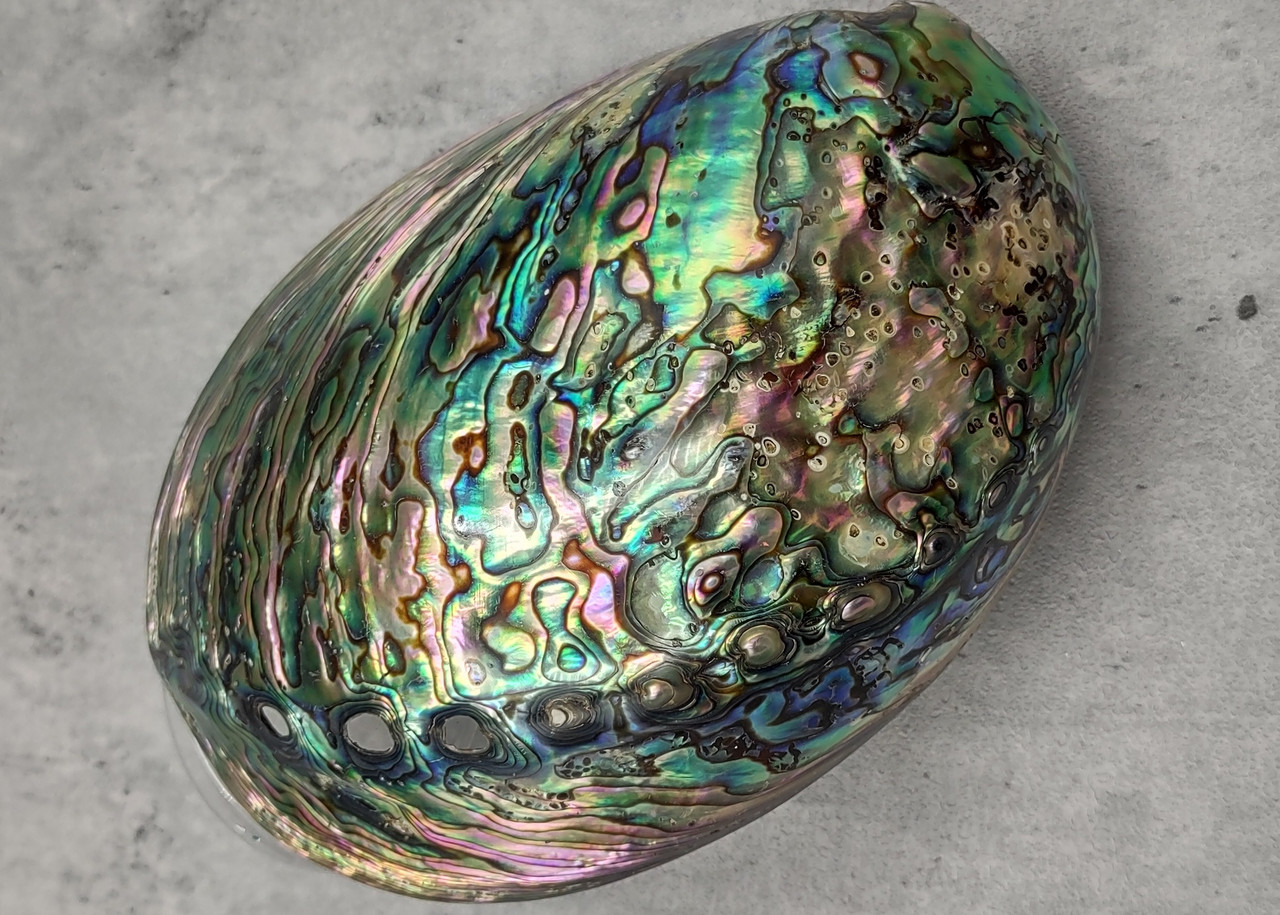

In [69]:
from IPython.display import Image
Image("abalone.jpg", width=200, height=100)

In [70]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import statsmodels.api as sm
from scipy.stats import median_abs_deviation as mad

abalone = pd.read_csv("data/abalone.csv")

df = abalone

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 1. prepare for classification


In [71]:
#no problem

## 2.Define variable

In [72]:
# Sex

## 3.Train and test

In [73]:

X = abalone.drop('Sex', axis=1)
y = abalone['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
import pandas as pd

print("Mean of X_train_scaled: ", np.mean(X_train_scaled))
print("Standard deviation of X_train_scaled: ", np.std(X_train_scaled))


Mean of X_train_scaled:  Length            4.973573e-16
Diameter          1.756884e-16
Height           -2.096829e-16
Whole weight      2.272950e-17
Shucked weight    2.295879e-16
Viscera weight    1.637753e-16
Shell weight      2.163788e-16
Rings            -1.895454e-16
dtype: float64
Standard deviation of X_train_scaled:  Length            1.0
Diameter          1.0
Height            1.0
Whole weight      1.0
Shucked weight    1.0
Viscera weight    1.0
Shell weight      1.0
Rings             1.0
dtype: float64


## 4.Logictic regression,Cross validation

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model.fit(X_train_scaled, y_train) 
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           F       0.50      0.38      0.43       262
           I       0.69      0.87      0.76       267
           M       0.52      0.51      0.52       307

    accuracy                           0.58       836
   macro avg       0.57      0.59      0.57       836
weighted avg       0.57      0.58      0.57       836

Confusion Matrix:
 [[100  45 117]
 [ 10 231  26]
 [ 89  61 157]]


In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.54219031 0.5475763  0.55615454]
Mean CV Score: 0.548640381369625


## 5.LDA

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Evaluate model (e.g., with classification_report)
y_pred_lda = lda_model.predict(X_test_scaled)
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda,zero_division=1))



LDA Classification Report:
               precision    recall  f1-score   support

           F       0.47      0.37      0.41       262
           I       0.68      0.79      0.73       267
           M       0.46      0.48      0.47       307

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.53      0.55      0.54       836

Confusion Matrix:
 [[100  45 117]
 [ 10 231  26]
 [ 89  61 157]]


## 6.QDA

In [77]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scaled, y_train)

y_pred_qda = qda_model.predict(X_test_scaled)
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda,zero_division=1))


QDA Classification Report:
               precision    recall  f1-score   support

           F       0.52      0.32      0.39       262
           I       0.60      0.88      0.71       267
           M       0.51      0.47      0.49       307

    accuracy                           0.55       836
   macro avg       0.54      0.56      0.53       836
weighted avg       0.54      0.55      0.53       836

Confusion Matrix:
 [[100  45 117]
 [ 10 231  26]
 [ 89  61 157]]


## 7.Decision tree

Decition Tree Classification Report:
               precision    recall  f1-score   support

           F       0.24      0.26      0.25       262
           I       0.57      0.01      0.03       267
           M       0.37      0.66      0.48       307

    accuracy                           0.33       836
   macro avg       0.39      0.31      0.25       836
weighted avg       0.39      0.33      0.26       836

Confusion Matrix:
 [[100  45 117]
 [ 10 231  26]
 [ 89  61 157]]


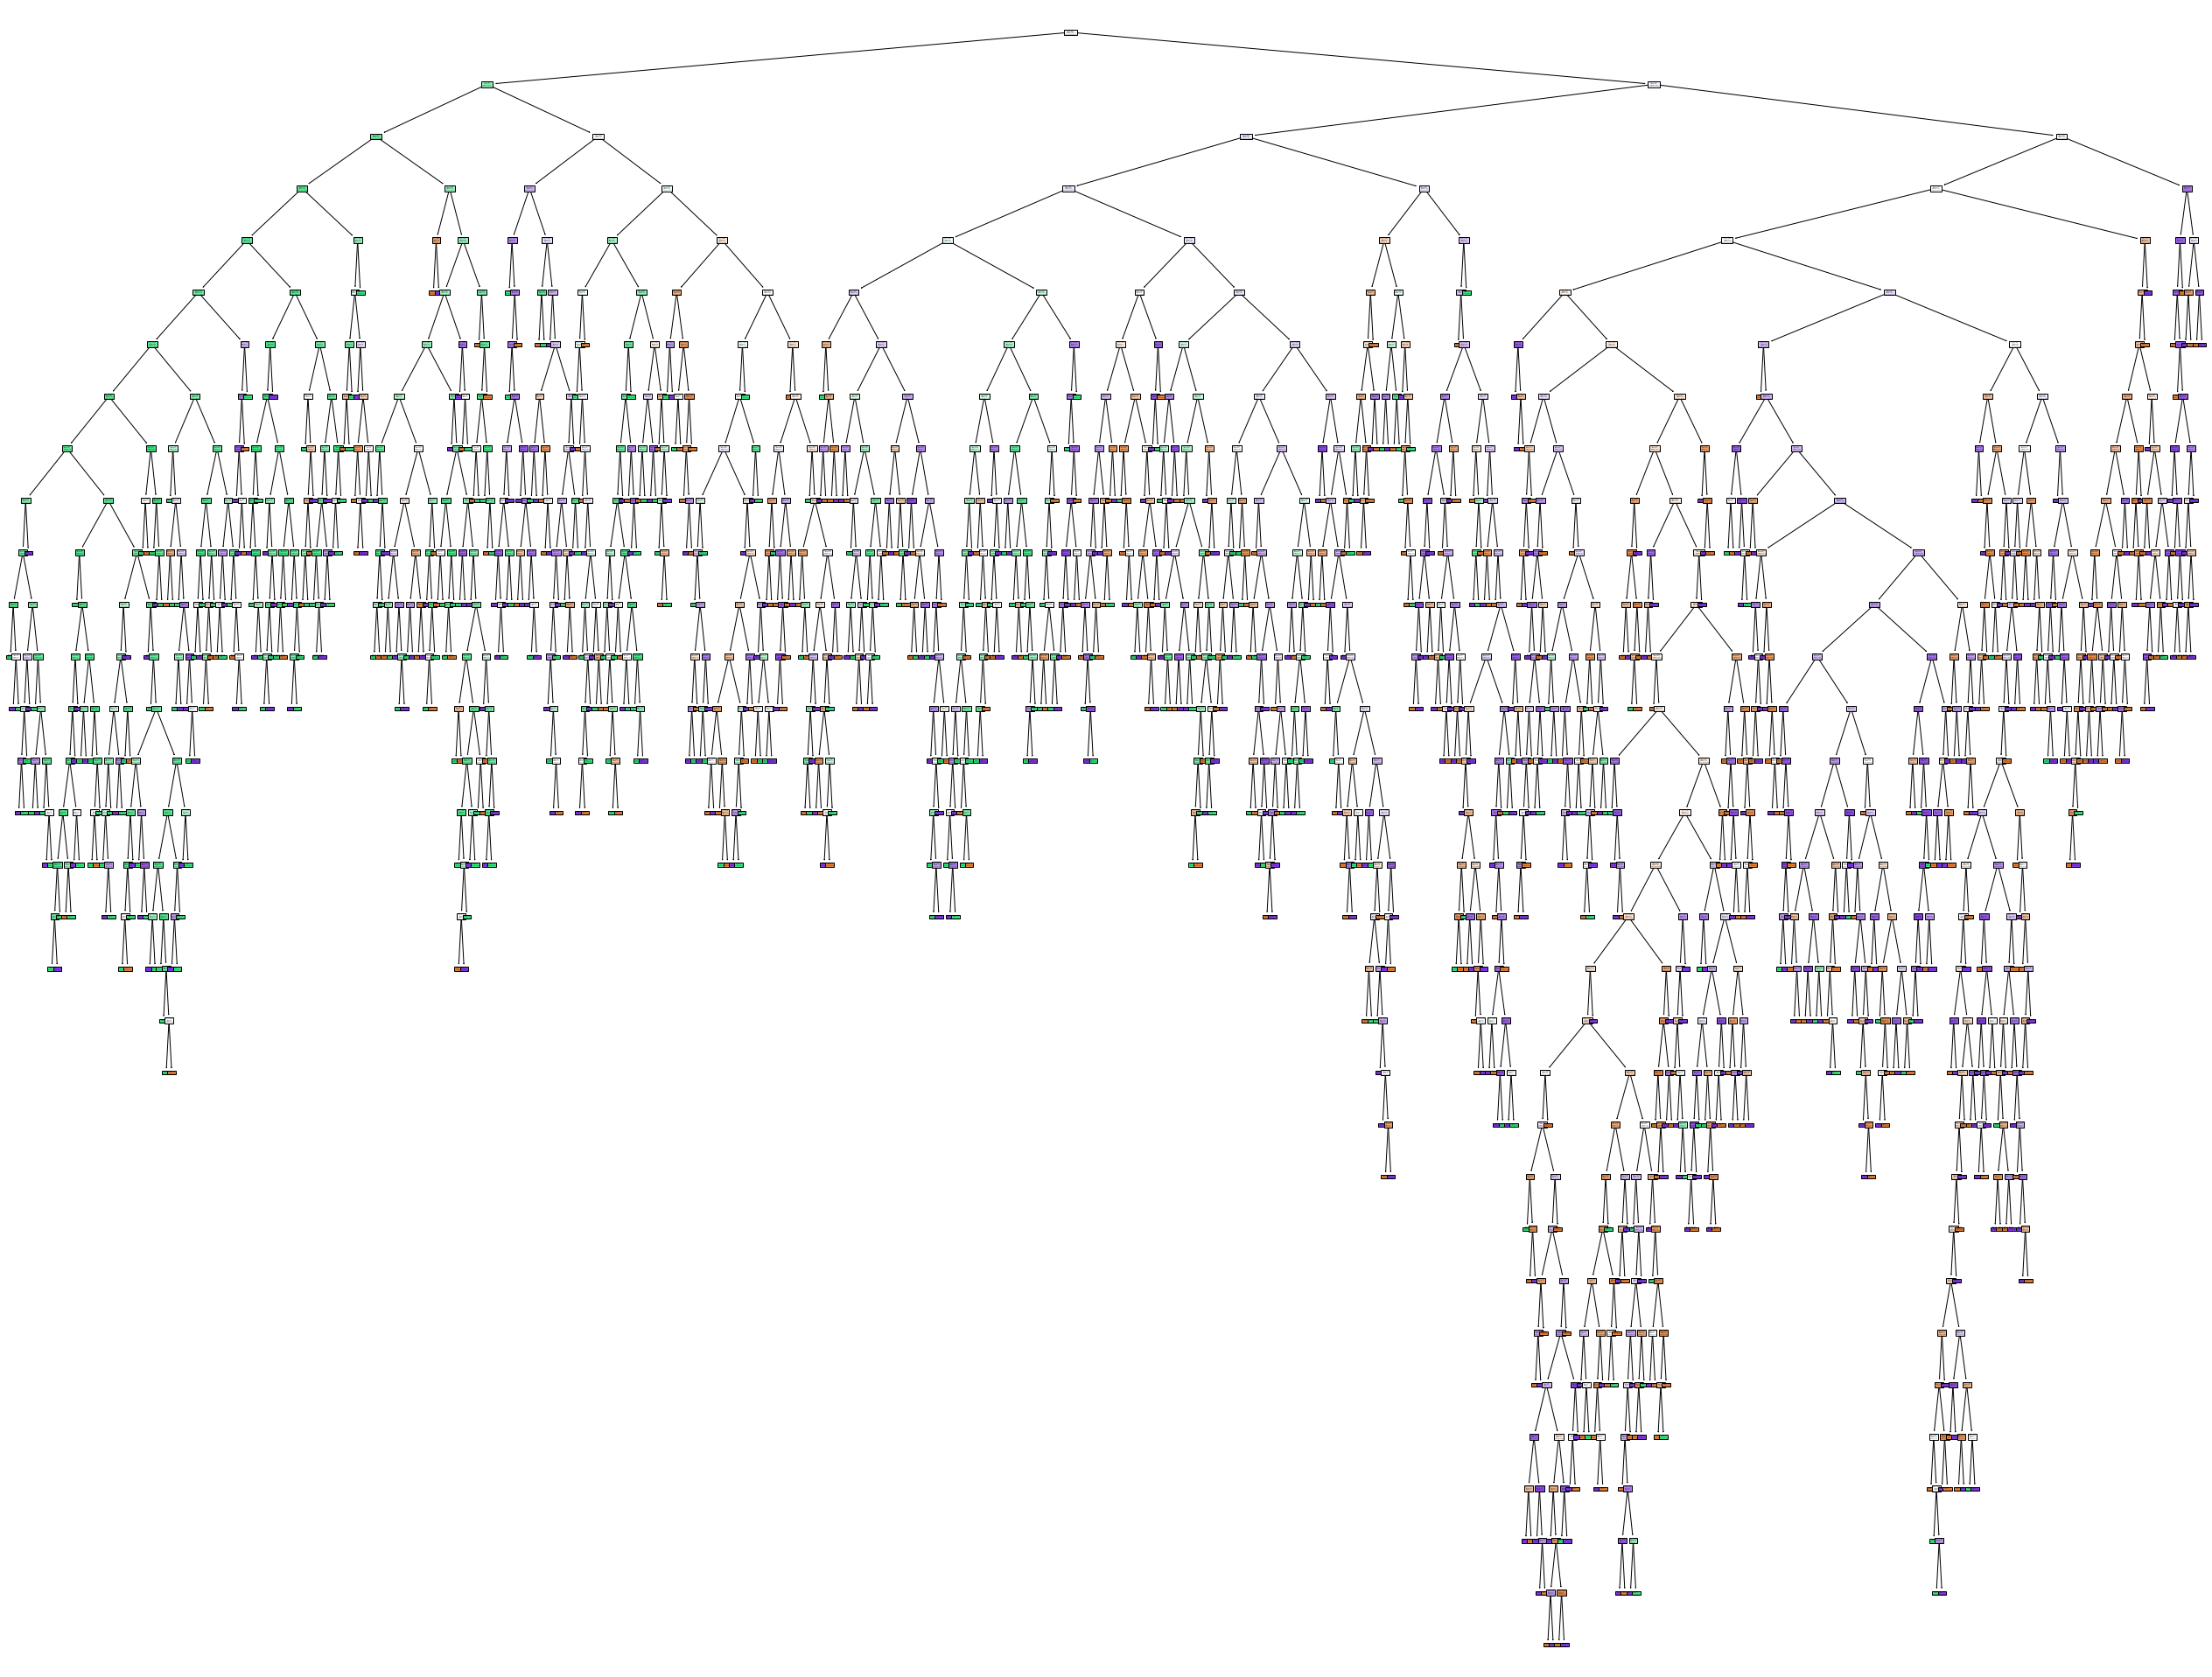

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4,random_state=42)
model.fit(X_train_scaled, y_train)

yp_model = model.predict(X_test)

print("Decition Tree Classification Report:\n", classification_report(y_test, yp_model,zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(45, 35))
plot_tree(model, filled=True)
plt.show()



## 8.Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf,zero_division=1))


Random Forest Classification Report:
               precision    recall  f1-score   support

           F       0.44      0.36      0.40       262
           I       0.73      0.76      0.74       267
           M       0.48      0.53      0.50       307

    accuracy                           0.55       836
   macro avg       0.55      0.55      0.55       836
weighted avg       0.55      0.55      0.55       836



## 9.Final result

In [80]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 0.5


## 10.Feature importance

In [82]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({"feature": abalone.drop('Sex', axis=1).columns, "importance": importances})

feature_importances = feature_importances.sort_values("importance", ascending=False)

print(feature_importances)


          feature  importance
5  Viscera weight    0.271975
4  Shucked weight    0.138037
3    Whole weight    0.137616
6    Shell weight    0.108594
0          Length    0.091286
7           Rings    0.089829
1        Diameter    0.083871
2          Height    0.078792
